### 1、导库

In [37]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

### 2、加载数据，探索数据

In [24]:
data = pd.read_csv('./data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3、数据预处理

In [26]:
#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
data.drop(["PassengerId", "Cabin", "Name", "Ticket"], inplace=True, axis=1)
#处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()

In [27]:
#将分类变量转换为数值型变量

#将二分类变量转换为数值型变量
#astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这个方式可以很便捷地将二分类特征转换为0~1
data["Sex"] = (data["Sex"] == "male").astype("int")
#将三分类变量转换为数值型变量 apply() 函数可以直接对 Series 或者 DataFrame 中元素进行逐元素遍历操作
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))
# 查看处理后的数据集
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


### 4、提取标签和特征矩阵，分测试集和训练集

In [28]:
y = data["Survived"]
X = data.drop("Survived", axis=1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3)
Xtrain.head()  # 索引乱了

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
551,2,1,27.000000,0,0,26.0000,0
168,1,1,29.699118,0,0,25.9250,0
297,1,0,2.000000,1,2,151.5500,0
590,3,1,35.000000,0,0,7.1250,0
332,1,1,38.000000,0,1,153.4625,0


In [29]:
#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,27.000000,0,0,26.0000,0
1,1,1,29.699118,0,0,25.9250,0
2,1,0,2.000000,1,2,151.5500,0
3,3,1,35.000000,0,0,7.1250,0
4,1,1,38.000000,0,1,153.4625,0


### 5、导入模型，粗略跑一下查看结果

In [30]:
clf = DecisionTreeClassifier(random_state=20)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.7752808988764045

In [31]:
# 使用交叉验证看下
clf = DecisionTreeClassifier(random_state=20)
score = cross_val_score(clf, X, y, cv=10).mean()
score

0.7784473953013279

### 6、在不同max_depth下观察模型的拟合状况

0.8200331971399386


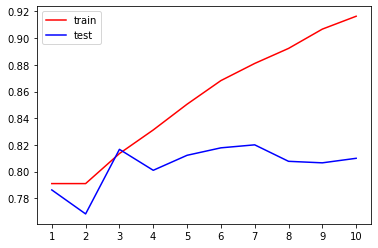

In [36]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=20
                                 , max_depth=i + 1
                                 , criterion="entropy"
                                 )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain, Ytrain)
    score_te = cross_val_score(clf, X, y, cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1, 11), tr, color="red", label="train")
plt.plot(range(1, 11), te, color="blue", label="test")
plt.xticks(range(1, 11))
plt.legend()
plt.show()
#这里为什么使用“entropy”？
#因为我们注意到，在最大深度=3的时候，模型拟合不足，在训练集和测试集上的表现接近，但却都不是非常理想，只能够达到82%左右，所以我们要使用entropy
#其实就两个参数，都试一下

### 7、用网格搜索调整参数

In [47]:
# 网格搜索的一串参数
parameters = {
    'criterion': ('gini', 'entropy'),
    'splitter': ('best', 'random'),
    'max_depth': [*range(1, 10)],
    'min_samples_leaf': [*range(1, 50, 5)],
    'min_impurity_decrease': [*np.linspace(0, 0.5, 20)]
}
clf = DecisionTreeClassifier(random_state=20)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.02631578947368421,
                                                   0.05263157894736842,
                                                   0.07894736842105263,
                                                   0.10526315789473684,
                                                   0.13157894736842105,
                                                   0.15789473684210525,
                                                   0.18421052631578946,
                                                   0.21052631578947367,
                                                   0.23684210526315788,
                                                   0.2631578947368421,
                                                   0.2894736842105263,
                                                   0.3157894736842105,
                                                   0.3421052631578947,
                                                   0.3684210526315789,
                                                   0.39473684210526316,
                                                   0.42105263157894735,
                                                   0.4473684210526315,
                                                   0.47368421052631576, 0.5],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46],
                         'splitter': ('best', 'random')})

In [48]:
GS.best_params_  # 网格搜索后的最佳参数

{'criterion': 'gini',
 'max_depth': 7,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [49]:
GS.best_score_  # 结果还不如第六步，我晕

0.8167434715821813